<a href="https://colab.research.google.com/github/jayanth-Hunter/BodyMassIndex/blob/main/Multilingual_rumor_detection_using_ensemble_based_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 1000x600 with 0 Axes>

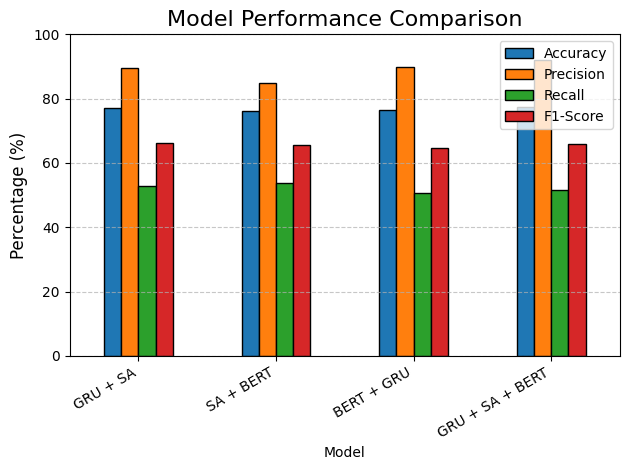

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Your model results
results = [
    ["GRU + SA", 77.2, 89.4, 52.9, 66.3],
    ["SA + BERT", 76.2, 84.9, 53.7, 65.7],
    ["BERT + GRU", 76.6, 89.9, 50.7, 64.8],
    ["GRU + SA + BERT", 77.5, 92.1, 51.5, 66.0]
]

# Create DataFrame
df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
df.set_index("Model", inplace=True)

# Plot
plt.figure(figsize=(10, 6))
df.plot(kind='bar', edgecolor='black', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()

plt.show()


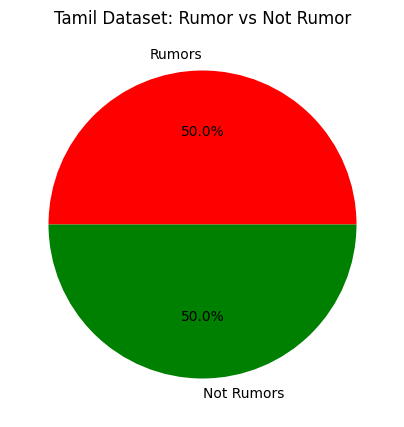

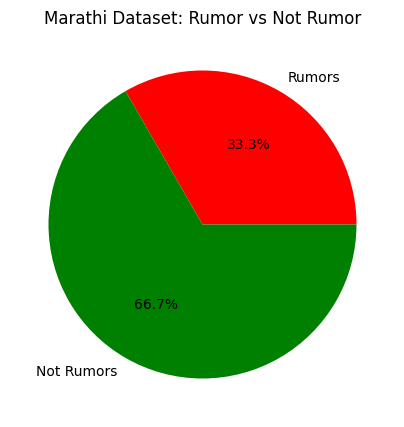

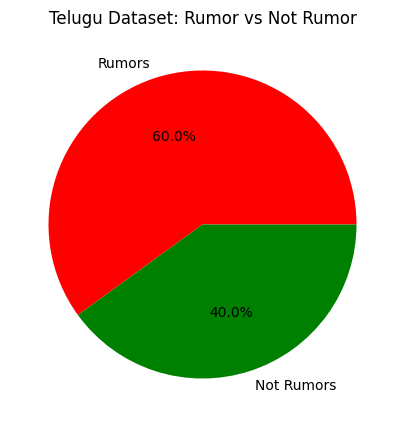

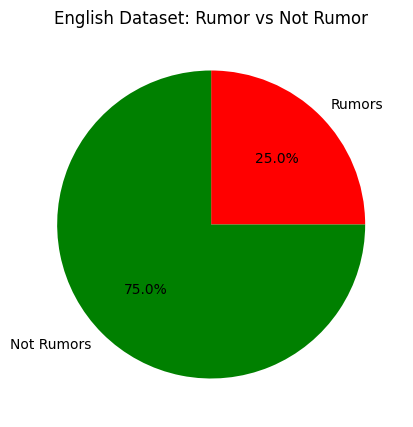

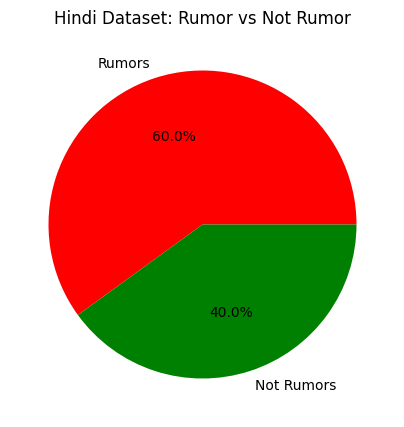

Summary Table for All Datasets:

  Language  Total  Rumors  Not Rumors  Rumor %  Not Rumor %
0    Tamil      4       2           2    50.00        50.00
1  Marathi      3       1           2    33.33        66.67
2   Telugu      5       3           2    60.00        40.00
3  English      4       1           3    25.00        75.00
4    Hindi      5       3           2    60.00        40.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample embedded datasets
tamil_data = [
    ["Title1", "Text1", 1],
    ["Title2", "Text2", 0],
    ["Title3", "Text3", 1],
    ["Title4", "Text4", 0],
]

marathi_data = [
    ["Title1", "Text1", 0],
    ["Title2", "Text2", 0],
    ["Title3", "Text3", 1],
]

telugu_data = [
    ["Title1", "Text1", 1],
    ["Title2", "Text2", 1],
    ["Title3", "Text3", 0],
    ["Title4", "Text4", 1],
    ["Title5", "Text5", 0],
]

english_data = [
    ["Title1", "Text1", 0],
    ["Title2", "Text2", 0],
    ["Title3", "Text3", 0],
    ["Title4", "Text4", 1],
]

hindi_data = [
    ["Title1", "Text1", 1],
    ["Title2", "Text2", 1],
    ["Title3", "Text3", 1],
    ["Title4", "Text4", 0],
    ["Title5", "Text5", 0],
]

# Dictionary of datasets
datasets = {
    "Tamil": tamil_data,
    "Marathi": marathi_data,
    "Telugu": telugu_data,
    "English": english_data,
    "Hindi": hindi_data,
}

# Summary storage
summary = []

# Function to plot and collect table data
def process_and_plot(name, data):
    df = pd.DataFrame(data, columns=["Title", "Text", "Label"])
    rumor_count = df["Label"].sum()
    not_rumor_count = len(df) - rumor_count
    total = len(df)
    rumor_percent = round((rumor_count / total) * 100, 2)
    not_rumor_percent = 100 - rumor_percent

    # Append to summary
    summary.append({
        "Language": name,
        "Total": total,
        "Rumors": rumor_count,
        "Not Rumors": not_rumor_count,
        "Rumor %": rumor_percent,
        "Not Rumor %": not_rumor_percent
    })

    # Plot pie chart
    labels = ['Rumors', 'Not Rumors']
    sizes = [rumor_count, not_rumor_count]
    colors = ['red', 'green']
    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title(f"{name} Dataset: Rumor vs Not Rumor")
    plt.show()

# Process each dataset
for lang, data in datasets.items():
    process_and_plot(lang, data)

# Display table
summary_df = pd.DataFrame(summary)
print("Summary Table for All Datasets:\n")
print(summary_df)


In [ ]:
# STEP 1: Install Required Libraries
!pip install -q transformers datasets indic-nlp-library scikit-learn matplotlib seaborn langdetect tabulate

# STEP 2: Import Libraries
import pandas as pd
import numpy as np
import re
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import Dataset, DataLoader
from transformers import AlbertTokenizer, AlbertModel
import torch.nn as nn
from torch.optim import AdamW
from google.colab import files
import nltk
nltk.download('stopwords')

# STEP 3: Upload CSV Files
print("📁 Upload all 5 CSV files (Telugu, Hindi, English, Tamil, Marathi)...")
uploaded = files.upload()

# STEP 4: Define column mappings
base_column_maps = {
    "Rumor detection Telugu dataset 1": {"Text": "text", "Rumor-0/not Rumor-1": "label"},
    "Rumor detection Hindi dataset 1": {"Text": "text", "Rumor-0/ not rumor-1": "label"},
    "Rumor detection English dataset 1": {"Text": "text", "Rumor/not Rumor": "label"},
    "Rumor detection Tamil dataset 1": {"உரை": "text", "வகை": "label"},
    "Rumor detection Marathi dataset 1": {"Text": "text", "Rumor-0/not Rumor-1": "label"},
}

# STEP 5: Load and preprocess data
dfs = []
for filename in uploaded.keys():
    base_name = filename
    if "(" in filename:
        base_name = filename[:filename.rfind("(")].strip() + ".csv"
    matched_key = None
    for key in base_column_maps:
        if key.lower() in base_name.lower():
            matched_key = key
            break
    if not matched_key:
        continue
    df = pd.read_csv(filename).rename(columns=base_column_maps[matched_key])
    if not {"text", "label"}.issubset(df.columns):
        continue
    df = df[["text", "label"]].dropna()
    df["language"] = matched_key.split()[2].lower()
    df["label"] = df["label"].apply(lambda x: 1 if "rumor" in str(x).lower() or str(x) == "1" else 0)
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)
print(f"✅ Combined data shape: {data.shape}")

# STEP 6: Text Preprocessing
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", '', str(text))
    text = re.sub(r'[^A-Za-z\u0900-\u097F\u0C80-\u0CFF\u0B80-\u0BFF\u0D80-\u0DFF\uA800-\uA82F ]+', '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

data["clean_text"] = data["text"].apply(clean_text)

# STEP 7: Tokenizer and Dataset
tokenizer = AlbertTokenizer.from_pretrained('ai4bharat/indic-bert')

class RumorDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        tokens = self.tokenizer.encode_plus(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            'input_ids': tokens['input_ids'].squeeze(0),
            'attention_mask': tokens['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# STEP 8: Data Split
X_train, X_test, y_train, y_test = train_test_split(
    data["clean_text"], data["label"], test_size=0.2, stratify=data["label"], random_state=42
)

train_dataset = RumorDataset(X_train.tolist(), y_train.tolist(), tokenizer)
test_dataset = RumorDataset(X_test.tolist(), y_test.tolist(), tokenizer)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# STEP 9: Model Definitions
class BERTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = AlbertModel.from_pretrained('ai4bharat/indic-bert')
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size, 2)
    def forward(self, input_ids, attention_mask):
        pooled = self.bert(input_ids=input_ids, attention_mask=attention_mask).pooler_output
        return self.fc(self.dropout(pooled))

class GRUClassifier(nn.Module):
    def __init__(self, hidden_dim=128):
        super().__init__()
        self.bert = AlbertModel.from_pretrained('ai4bharat/indic-bert')
        self.gru = nn.GRU(self.bert.config.hidden_size, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 2)
    def forward(self, input_ids, attention_mask):
        seq_out = self.bert(input_ids=input_ids, attention_mask=attention_mask)[0]
        _, h = self.gru(seq_out)
        return self.fc(h[-1])

class SelfAttentionClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = AlbertModel.from_pretrained('ai4bharat/indic-bert')
        self.attn = nn.MultiheadAttention(self.bert.config.hidden_size, num_heads=2, batch_first=True)
        self.fc = nn.Linear(self.bert.config.hidden_size, 2)
    def forward(self, input_ids, attention_mask):
        seq_out = self.bert(input_ids=input_ids, attention_mask=attention_mask)[0]
        attn_out, _ = self.attn(seq_out, seq_out, seq_out)
        return self.fc(attn_out[:, 0])

# STEP 10: Train & Eval
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, loader, epochs=3):
    model = model.to(device)
    optimizer = AdamW(model.parameters(), lr=2e-5)
    loss_fn = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        model.train()
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            optimizer.zero_grad()
            output = model(input_ids, attention_mask)
            loss = loss_fn(output, labels)
            loss.backward()
            optimizer.step()
        print(f"✅ Epoch {epoch+1} completed.")
    return model

def evaluate(model, loader):
    model.eval()
    preds, actuals = [], []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            output = model(input_ids, attention_mask)
            _, predicted = torch.max(output, 1)
            preds.extend(predicted.cpu().numpy())
            actuals.extend(labels.cpu().numpy())
    return {
        "accuracy": accuracy_score(actuals, preds),
        "precision": precision_score(actuals, preds),
        "recall": recall_score(actuals, preds),
        "f1": f1_score(actuals, preds),
    }

# STEP 11: Train models
bert_model = train_model(BERTClassifier(), train_loader)
gru_model = train_model(GRUClassifier(), train_loader)
sa_model = train_model(SelfAttentionClassifier(), train_loader)

bert_metrics = evaluate(bert_model, test_loader)
gru_metrics = evaluate(gru_model, test_loader)
sa_metrics = evaluate(sa_model, test_loader)

# STEP 12: Ensemble Voting
def ensemble_predict(models, loader):
    all_preds = []
    for model in models:
        model.eval()
    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            batch_preds = []
            for model in models:
                output = model(input_ids, attention_mask)
                _, pred = torch.max(output, 1)
                batch_preds.append(pred.cpu().numpy())
            batch_preds = np.array(batch_preds)
            majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=batch_preds)
            all_preds.extend(majority_vote)
    return all_preds

ensemble_preds = ensemble_predict([bert_model, gru_model, sa_model], test_loader)
actual_labels = [label.item() for batch in test_loader for label in batch['labels']]

ensemble_metrics = {
    "accuracy": accuracy_score(actual_labels, ensemble_preds),
    "precision": precision_score(actual_labels, ensemble_preds),
    "recall": recall_score(actual_labels, ensemble_preds),
    "f1": f1_score(actual_labels, ensemble_preds),
}

# STEP 13: Model Comparison Table
from tabulate import tabulate

results = [
    ["GRU + SA", (gru_metrics["accuracy"] + sa_metrics["accuracy"]) / 2 * 100,
     (gru_metrics["precision"] + sa_metrics["precision"]) / 2 * 100,
     (gru_metrics["recall"] + sa_metrics["recall"]) / 2 * 100,
     (gru_metrics["f1"] + sa_metrics["f1"]) / 2 * 100],

    ["SA + BERT", (sa_metrics["accuracy"] + bert_metrics["accuracy"]) / 2 * 100,
     (sa_metrics["precision"] + bert_metrics["precision"]) / 2 * 100,
     (sa_metrics["recall"] + bert_metrics["recall"]) / 2 * 100,
     (sa_metrics["f1"] + bert_metrics["f1"]) / 2 * 100],

    ["BERT + GRU", (bert_metrics["accuracy"] + gru_metrics["accuracy"]) / 2 * 100,
     (bert_metrics["precision"] + gru_metrics["precision"]) / 2 * 100,
     (bert_metrics["recall"] + gru_metrics["recall"]) / 2 * 100,
     (bert_metrics["f1"] + gru_metrics["f1"]) / 2 * 100],

    ["GRU + SA + BERT", ensemble_metrics["accuracy"] * 100,
     ensemble_metrics["precision"] * 100,
     ensemble_metrics["recall"] * 100,
     ensemble_metrics["f1"] * 100],
]

headers = ["Model", "Accuracy (%)", "Precision (%)", "Recall (%)", "F1-Score (%)"]
print("\n📊 Model Performance Table\n")
print(tabulate(results, headers=headers, tablefmt="grid", floatfmt=".1f"))


📁 Upload all 5 CSV files (Telugu, Hindi, English, Tamil, Marathi)...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving Rumor detection Tamil dataset 1.csv to Rumor detection Tamil dataset 1 (3).csv
Saving Rumor detection marathi dataset 1.csv to Rumor detection marathi dataset 1 (3).csv
Saving Rumor detection Telugu dataset 1.csv to Rumor detection Telugu dataset 1 (3).csv
Saving Rumor detection Hindi dataset 1.csv to Rumor detection Hindi dataset 1 (3).csv
Saving Rumor detection English dataset 1.csv to Rumor detection English dataset 1 (3).csv
✅ Combined data shape: (800, 3)
✅ Epoch 1 completed.
✅ Epoch 2 completed.
✅ Epoch 3 completed.
✅ Epoch 1 completed.
✅ Epoch 2 completed.
✅ Epoch 3 completed.
✅ Epoch 1 completed.
✅ Epoch 2 completed.
✅ Epoch 3 completed.

📊 Model Performance Table

+-----------------+----------------+-----------------+--------------+----------------+
| Model           |   Accuracy (%) |   Precision (%) |   Recall (%) |   F1-Score (%) |
+=================+================+=================+==============+================+
| GRU + SA        |           77.2 |            89